In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from pandas.plotting import autocorrelation_plot 
from statsmodels.graphics.tsaplots import plot_pacf 
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys 
import seaborn as sns 
import statsmodels 
import statsmodels.stats.diagnostic as diag 
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest 
from matplotlib.pyplot import acorr 

plt.style.use('fivethirtyeight') 

%matplotlib inline 

df = pd.read_csv('data_stocks.csv') 
df.head() 


,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [2]:
df['DATE'] = pd.to_datetime(df['DATE'],unit='s')

In [3]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,2017-04-03 13:30:00,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,2017-04-03 13:31:00,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,2017-04-03 13:32:00,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,2017-04-03 13:33:00,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,2017-04-03 13:34:00,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [4]:
stock_data_copy = df.copy()
stock_data_copy.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,2017-04-03 13:30:00,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,2017-04-03 13:31:00,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,2017-04-03 13:32:00,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,2017-04-03 13:33:00,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,2017-04-03 13:34:00,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [5]:
# Create DF_list -> Dictionary which contains all the stocks data items with the values as Open, Close, High, Low
# Create DF_list1 -> Dictionary which contains all the stocks data items with the Closing values
DF_list = {}
DF_list1 = {}
df2 = pd.DataFrame()
for column in stock_data_copy.columns[1:]:
    try :
        df_col = column.split('.')[1]
        #print(df_col)
    except :
        df_col = column        
        
    Open = stock_data_copy.groupby([stock_data_copy['DATE'].dt.date])[column].first()
    Low = stock_data_copy.groupby([stock_data_copy['DATE'].dt.date])[column].min()
    High = stock_data_copy.groupby([stock_data_copy['DATE'].dt.date])[column].max()
    Close = stock_data_copy.groupby([stock_data_copy['DATE'].dt.date])[column].last()
        
    df = pd.DataFrame([Open,Close,Low,High])
    #df1 = pd.concat([df1,Close])
    df1 = pd.DataFrame([Close])
    
    df = df.transpose()
    df1 = df1.transpose()
    
    df.columns = ['Open','Low','High','Close']
    df1.columns = [df_col]
    
    DF_list[df_col] = df
    DF_list1[df_col] = df1
    #df2.join(df1)
    #print(df.head())

In [6]:
# Create a DataFrame df5 (Merge all the stock data present in the dictionary DF_list1)
df5 = DF_list1['AAL'].reset_index()
for item in DF_list1.keys():
    df5 = pd.merge(df5,DF_list1[item].reset_index())
df5.index = df5['DATE']
df5 = df5.drop('DATE', axis=1)

In [7]:
# View header of the merged DataFrame df5
df5.head()

,AAL,SP500,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,AMAT,...,WYN,XEC,XEL,XL,XOM,XRX,XYL,YUM,ZBH,ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
2017-04-03,42.48,2358.9600,143.700,129.62,81.22,101.27,85.39,58.10,119.28,38.89,...,84.01,118.11,44.39,39.39,82.08,7.25,49.43,63.55,121.35,53.175
2017-04-04,40.90,2359.9600,144.770,130.04,81.24,101.45,84.95,59.30,118.30,39.00,...,84.18,119.92,44.50,39.71,82.34,7.22,50.36,63.84,120.78,52.640
2017-04-05,41.31,2352.8401,144.020,129.89,80.04,101.93,83.54,58.80,116.21,38.38,...,84.34,117.65,44.81,39.37,82.53,7.15,50.41,63.87,120.17,52.670
2017-04-06,41.72,2357.6699,143.685,130.15,80.32,101.75,84.07,58.73,115.49,38.59,...,85.17,118.14,44.60,39.80,83.02,7.13,50.93,64.56,120.22,52.680
2017-04-07,41.81,2355.6899,143.340,130.22,80.01,102.19,84.79,58.10,115.62,38.93,...,84.69,118.22,44.40,39.82,82.78,7.13,50.84,64.28,119.88,52.550


In [8]:
df5['AAL']

DATE
2017-04-03    42.48
2017-04-04    40.90
2017-04-05    41.31
2017-04-06    41.72
2017-04-07    41.81
              ...  
2017-08-25    45.25
2017-08-28    44.95
2017-08-29    44.56
2017-08-30    44.32
2017-08-31    44.74
Name: AAL, Length: 106, dtype: float64

In [9]:
# Create a DataFrame df5 (Merge all the stock data present in the dictionary DF_list1)
df5 = DF_list1['AAL'].reset_index()
for item in DF_list1.keys():
    df5 = pd.merge(df5,DF_list1[item].reset_index())
df5.index = df5['DATE']
df5 = df5.drop('DATE', axis=1)

In [10]:
# View header of the merged DataFrame df5
df5.head()

,AAL,SP500,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,AMAT,...,WYN,XEC,XEL,XL,XOM,XRX,XYL,YUM,ZBH,ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
2017-04-03,42.48,2358.9600,143.700,129.62,81.22,101.27,85.39,58.10,119.28,38.89,...,84.01,118.11,44.39,39.39,82.08,7.25,49.43,63.55,121.35,53.175
2017-04-04,40.90,2359.9600,144.770,130.04,81.24,101.45,84.95,59.30,118.30,39.00,...,84.18,119.92,44.50,39.71,82.34,7.22,50.36,63.84,120.78,52.640
2017-04-05,41.31,2352.8401,144.020,129.89,80.04,101.93,83.54,58.80,116.21,38.38,...,84.34,117.65,44.81,39.37,82.53,7.15,50.41,63.87,120.17,52.670
2017-04-06,41.72,2357.6699,143.685,130.15,80.32,101.75,84.07,58.73,115.49,38.59,...,85.17,118.14,44.60,39.80,83.02,7.13,50.93,64.56,120.22,52.680
2017-04-07,41.81,2355.6899,143.340,130.22,80.01,102.19,84.79,58.10,115.62,38.93,...,84.69,118.22,44.40,39.82,82.78,7.13,50.84,64.28,119.88,52.550


In [11]:
df6 = df5[['AAPL', 'ADP', 'CBOE', 'CSCO', 'EBAY']]
df6.head()

,AAPL,ADP,CBOE,CSCO,EBAY
DATE,,,,,
2017-04-03,143.700,101.27,80.67,33.580,33.76
2017-04-04,144.770,101.45,80.89,33.410,34.14
2017-04-05,144.020,101.93,80.42,33.000,33.81
2017-04-06,143.685,101.75,80.32,33.075,34.16
2017-04-07,143.340,102.19,81.08,32.960,33.91


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


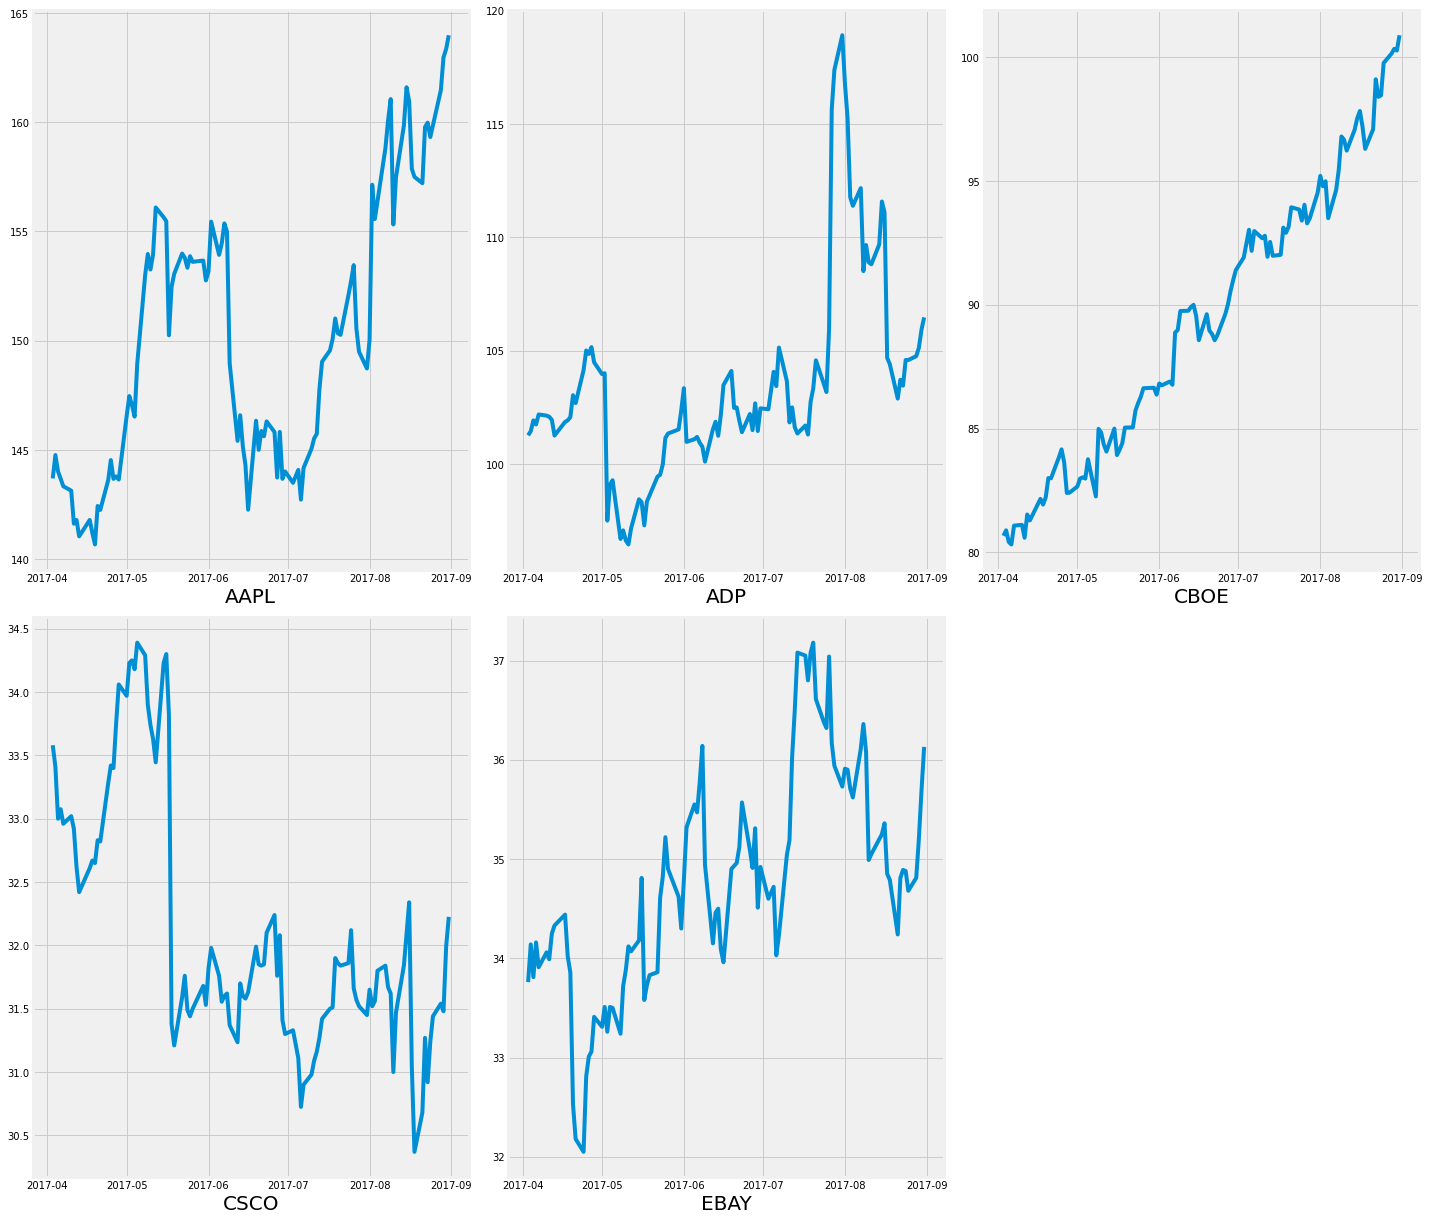

In [12]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df6:
    if plotnumber<=6 :
        ax = plt.subplot(3,3,plotnumber)
        plt.plot(df6[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [13]:
from statsmodels.tsa.stattools import adfuller


In [ ]:
# Forecasting AAPL

In [14]:
df_AAPL = df6['AAPL'].to_frame()


In [15]:
print(df_AAPL.isnull().sum().sum())

0


In [16]:
df_AAPL.dropna(inplace= True)

In [17]:
test_result=adfuller(df_AAPL['AAPL'])

In [19]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


In [20]:
adf_test(df_AAPL['AAPL'])


Results of Dickey-Fuller Test:
Test Statistic                 -0.754829
p-value                         0.832032
#Lags Used                      6.000000
Number of Observations Used    99.000000
Critical Value (1%)            -3.498198
Critical Value (5%)            -2.891208
Critical Value (10%)           -2.582596
dtype: float64


In [21]:
df_AAPL['AAPL First Difference'] = df_AAPL['AAPL'] - df_AAPL['AAPL'].shift(1)


In [22]:
print(df_AAPL.isnull().sum().sum())

1


In [23]:
df_AAPL.dropna(inplace= True)

In [24]:
print(df_AAPL.isnull().sum().sum())

0


In [30]:
df_AAPL['AAPL seasonal First Difference'] = df_AAPL['AAPL'] - df_AAPL['AAPL'].shift(1)
df_AAPL.head(14)


,AAPL,AAPL First Difference,AAPL seasonal First Difference
DATE,,,
2017-04-21,142.2600,-0.1800,NaN
2017-04-24,143.6200,1.3600,1.3600
2017-04-25,144.5400,0.9200,0.9200
2017-04-26,143.6800,-0.8600,-0.8600
2017-04-27,143.7900,0.1100,0.1100
2017-04-28,143.6500,-0.1400,-0.1400
2017-05-01,146.5700,2.9200,2.9200
2017-05-02,147.4700,0.9000,0.9000
2017-05-03,147.0600,-0.4100,-0.4100


In [31]:
df_AAPL.dropna(inplace=True)


In [32]:
print(df_AAPL.isnull().sum().sum())

0


In [33]:
adf_test(df_AAPL['AAPL seasonal First Difference'])


Results of Dickey-Fuller Test:
Test Statistic                 -4.143387
p-value                         0.000820
#Lags Used                      5.000000
Number of Observations Used    86.000000
Critical Value (1%)            -3.508783
Critical Value (5%)            -2.895784
Critical Value (10%)           -2.585038
dtype: float64


<AxesSubplot:xlabel='DATE'>

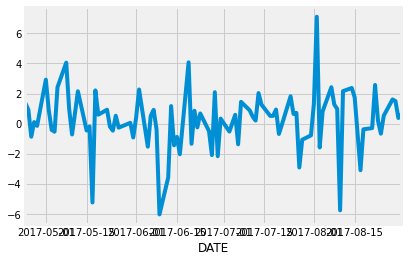

In [34]:
df_AAPL['AAPL seasonal First Difference'].plot()


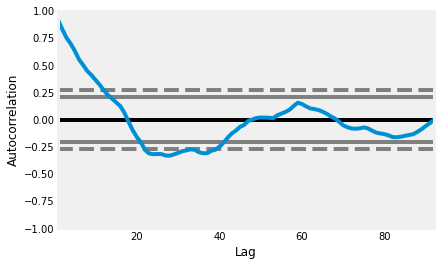

In [36]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_AAPL['AAPL'])
plt.show()


In [39]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

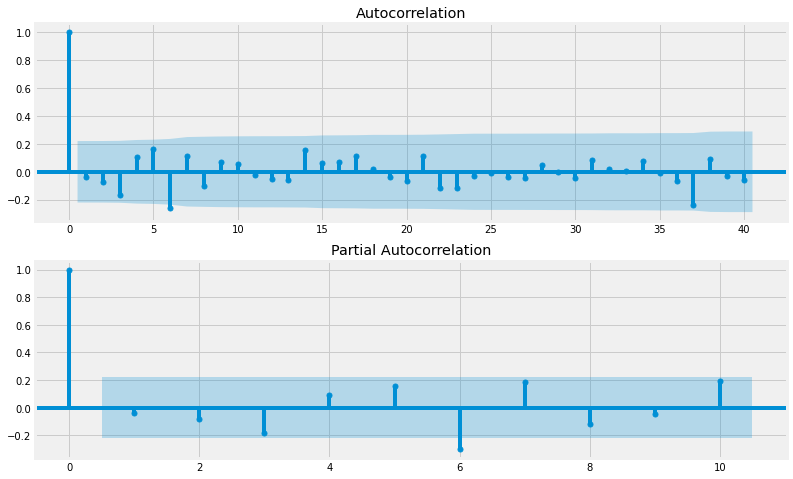

In [42]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_AAPL['AAPL seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_AAPL['AAPL seasonal First Difference'].iloc[13:],lags=10,ax=ax2)


In [43]:
# For non-seasonal data
#p=1, d=1, q= 1
from statsmodels.tsa.arima_model import ARIMA

In [44]:
model=ARIMA(df_AAPL['AAPL'],order=(1,1,1))
model_fit=model.fit()


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date ind

In [45]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.AAPL   No. Observations:                   91
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -186.692
Method:                       css-mle   S.D. of innovations              1.879
Date:                Wed, 30 Dec 2020   AIC                            381.383
Time:                        14:30:24   BIC                            391.426
Sample:                             1   HQIC                           385.435
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2226      0.204      1.090      0.276      -0.178       0.623
ar.L1.D.AAPL    -0.8959      0.080    -11.140      0.000      -1.054      -0.738
ma.L1.D.AAPL     0.9664      0.050     19.255      0.000       0.868       1.065
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1162           +0.0000j            1.1162            0.5000
MA.1           -1.0347           +0.0000j            1.0347            0.5000
-----------------------------------------------------------------------------
"""

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


<AxesSubplot:xlabel='DATE'>

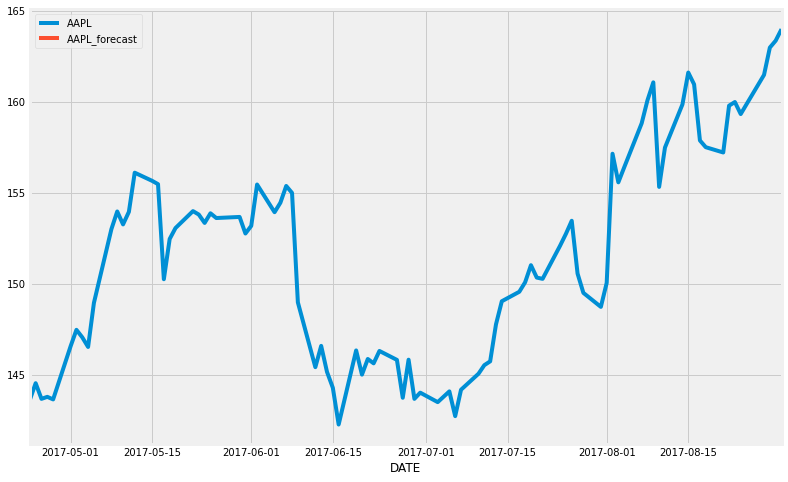

In [46]:
df_AAPL['AAPL_forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df_AAPL[['AAPL','AAPL_forecast']].plot(figsize=(12,8))

In [47]:
# Forecasting ADP

In [48]:
df_ADP = df6['ADP'].to_frame()


In [49]:
print(df_ADP.isnull().sum().sum())

0


In [50]:
df_ADP.dropna(inplace= True)

In [51]:
test_result=adfuller(df_ADP['ADP'])

In [52]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


In [53]:
adf_test(df_ADP['ADP'])


Results of Dickey-Fuller Test:
Test Statistic                  -1.940816
p-value                          0.313110
#Lags Used                       0.000000
Number of Observations Used    105.000000
Critical Value (1%)             -3.494220
Critical Value (5%)             -2.889485
Critical Value (10%)            -2.581676
dtype: float64


In [54]:
#the test statistic > critical value, which implies that the series is not stationary. 

In [55]:
df_ADP['ADP First Difference'] = df_ADP['ADP'] - df_ADP['ADP'].shift(1)


In [56]:
print(df_ADP.isnull().sum().sum())

1


In [57]:
df_ADP.dropna(inplace= True)

In [58]:
print(df_ADP.isnull().sum().sum())

0


In [59]:
df_ADP['ADP seasonal First Difference'] = df_ADP['ADP'] - df_ADP['ADP'].shift(1)
df_ADP.head(14)


,ADP,ADP First Difference,ADP seasonal First Difference
DATE,,,
2017-04-04,101.45,0.18,NaN
2017-04-05,101.93,0.48,0.48
2017-04-06,101.75,-0.18,-0.18
2017-04-07,102.19,0.44,0.44
2017-04-10,102.14,-0.05,-0.05
2017-04-11,102.09,-0.05,-0.05
2017-04-12,101.95,-0.14,-0.14
2017-04-13,101.26,-0.69,-0.69
2017-04-17,101.86,0.60,0.60


In [60]:
df_ADP.dropna(inplace=True)


In [61]:
print(df_ADP.isnull().sum().sum())

0


In [63]:
adf_test(df_ADP['ADP seasonal First Difference'])


Results of Dickey-Fuller Test:
Test Statistic                -9.128735e+00
p-value                        3.062858e-15
#Lags Used                     0.000000e+00
Number of Observations Used    1.030000e+02
Critical Value (1%)           -3.495493e+00
Critical Value (5%)           -2.890037e+00
Critical Value (10%)          -2.581971e+00
dtype: float64


<AxesSubplot:xlabel='DATE'>

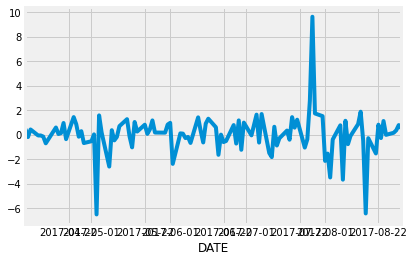

In [64]:
df_ADP['ADP seasonal First Difference'].plot()


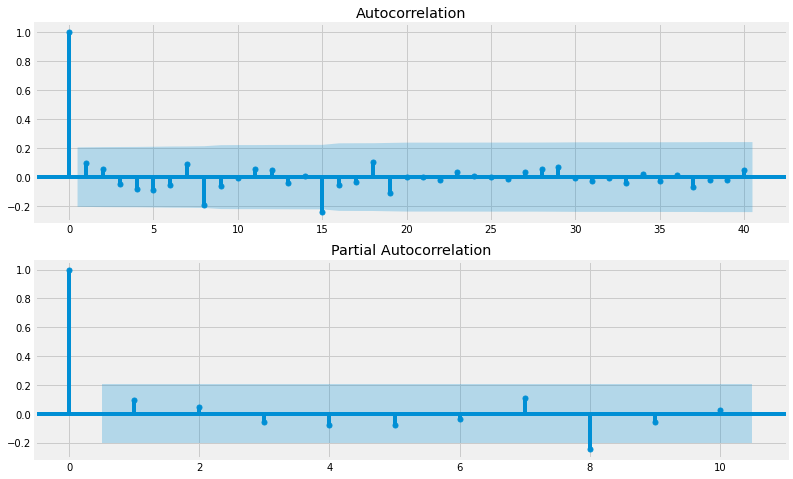

In [65]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_ADP['ADP seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_ADP['ADP seasonal First Difference'].iloc[13:],lags=10,ax=ax2)


In [66]:
model=ARIMA(df_ADP['ADP'],order=(1,1,1))
model_fit=model.fit()


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date ind

In [67]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.ADP   No. Observations:                  103
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -200.146
Method:                       css-mle   S.D. of innovations              1.689
Date:                Wed, 30 Dec 2020   AIC                            408.292
Time:                        14:47:26   BIC                            418.831
Sample:                             1   HQIC                           412.561
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0447      0.189      0.237      0.813      -0.325       0.414
ar.L1.D.ADP     0.2857      0.527      0.542      0.588      -0.748       1.319
ma.L1.D.ADP    -0.1892      0.535     -0.354      0.723      -1.237       0.858
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.4996           +0.0000j            3.4996            0.0000
MA.1            5.2859           +0.0000j            5.2859            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='DATE'>

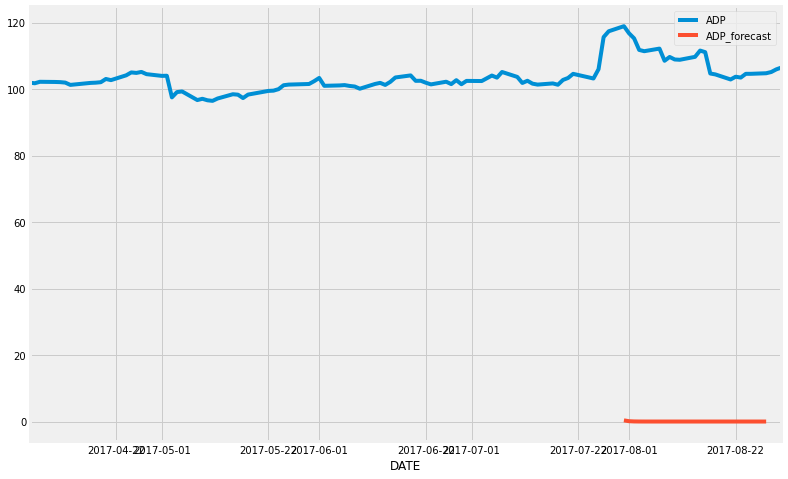

In [71]:
df_ADP['ADP_forecast']=model_fit.predict(start=80,end=100,dynamic=True)
df_ADP[['ADP','ADP_forecast']].plot(figsize=(12,8))

In [72]:
#forecast CBOE STOCK

In [73]:
df_CBOE = df6['CBOE'].to_frame()


In [74]:
print(df_CBOE.isnull().sum().sum())


0


In [75]:
df_CBOE.dropna(inplace= True)


In [76]:
test_result=adfuller(df_CBOE['CBOE'])


In [78]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)



In [79]:
adf_test(df_CBOE['CBOE'])


Results of Dickey-Fuller Test:
Test Statistic                   0.381563
p-value                          0.980792
#Lags Used                       1.000000
Number of Observations Used    104.000000
Critical Value (1%)             -3.494850
Critical Value (5%)             -2.889758
Critical Value (10%)            -2.581822
dtype: float64


In [80]:
df_CBOE['CBOE First Difference'] = df_CBOE['CBOE'] - df_CBOE['CBOE'].shift(1)


In [81]:
print(df_CBOE.isnull().sum().sum())


1


In [82]:
df_CBOE.dropna(inplace= True)


In [83]:
print(df_CBOE.isnull().sum().sum())


0


In [84]:
df_CBOE['CBOE seasonal First Difference'] = df_CBOE['CBOE'] - df_CBOE['CBOE'].shift(1)


In [85]:
df_CBOE.head(14)


,CBOE,CBOE First Difference,CBOE seasonal First Difference
DATE,,,
2017-04-04,80.89,0.22,NaN
2017-04-05,80.42,-0.47,-0.47
2017-04-06,80.32,-0.10,-0.10
2017-04-07,81.08,0.76,0.76
2017-04-10,81.11,0.03,0.03
2017-04-11,80.59,-0.52,-0.52
2017-04-12,81.53,0.94,0.94
2017-04-13,81.29,-0.24,-0.24
2017-04-17,82.16,0.87,0.87


In [86]:
df_CBOE.dropna(inplace=True)


In [87]:
print(df_CBOE.isnull().sum().sum())


0


In [88]:
adf_test(df_CBOE['CBOE seasonal First Difference'])


Results of Dickey-Fuller Test:
Test Statistic                -1.298913e+01
p-value                        2.836794e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.030000e+02
Critical Value (1%)           -3.495493e+00
Critical Value (5%)           -2.890037e+00
Critical Value (10%)          -2.581971e+00
dtype: float64


<AxesSubplot:xlabel='DATE'>

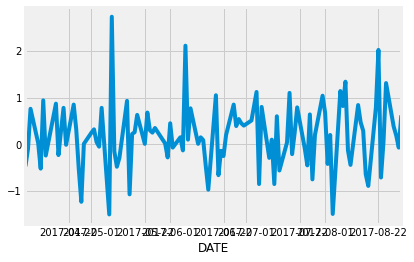

In [89]:
df_CBOE['CBOE seasonal First Difference'].plot()


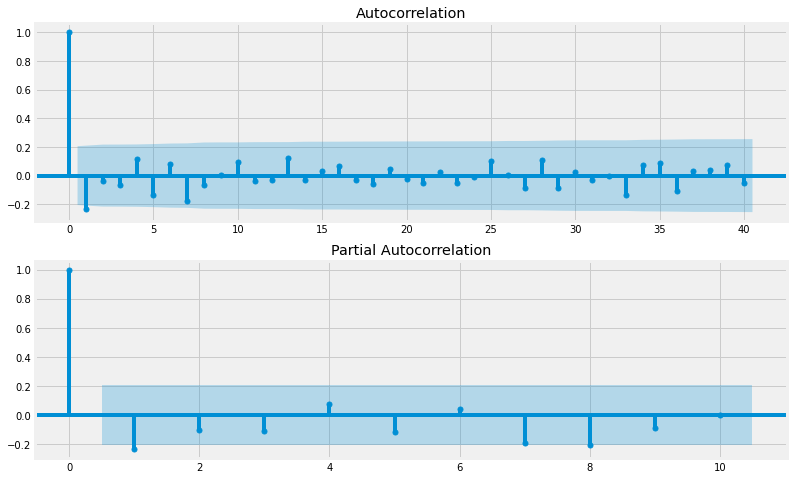

In [90]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_CBOE['CBOE seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_CBOE['CBOE seasonal First Difference'].iloc[13:],lags=10,ax=ax2)


In [91]:
model=ARIMA(df_CBOE['CBOE'],order=(1,1,1))
model_fit=model.fit()


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date ind

In [92]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.CBOE   No. Observations:                  103
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -102.682
Method:                       css-mle   S.D. of innovations              0.646
Date:                Wed, 30 Dec 2020   AIC                            213.363
Time:                        14:58:40   BIC                            223.902
Sample:                             1   HQIC                           217.632
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1877      0.006     30.004      0.000       0.175       0.200
ar.L1.D.CBOE     0.6816      0.077      8.861      0.000       0.531       0.832
ma.L1.D.CBOE    -1.0000      0.036    -27.732      0.000      -1.071      -0.929
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4671           +0.0000j            1.4671            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
#CSCO STOCK FORECAST

In [93]:
df_CSCO = df6['CSCO'].to_frame()


In [94]:
print(df_CSCO.isnull().sum().sum())


0


In [95]:
df_CSCO.dropna(inplace= True)


In [96]:
test_result=adfuller(df_CSCO['CSCO'])


In [97]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


In [98]:
adf_test(df_CSCO['CSCO'])


Results of Dickey-Fuller Test:
Test Statistic                  -1.958031
p-value                          0.305273
#Lags Used                       2.000000
Number of Observations Used    103.000000
Critical Value (1%)             -3.495493
Critical Value (5%)             -2.890037
Critical Value (10%)            -2.581971
dtype: float64


In [99]:
df_CSCO['CSCO First Difference'] = df_CSCO['CSCO'] - df_CSCO['CSCO'].shift(1)


In [100]:
print(df_CSCO.isnull().sum().sum())


1


In [101]:
df_CSCO.dropna(inplace= True)


In [102]:
print(df_CSCO.isnull().sum().sum())


0


In [103]:
df_CSCO['CSCO seasonal First Difference'] = df_CSCO['CSCO'] - df_CSCO['CSCO'].shift(1)


In [104]:
df_CSCO.head(14)


,CSCO,CSCO First Difference,CSCO seasonal First Difference
DATE,,,
2017-04-04,33.410,-0.170,NaN
2017-04-05,33.000,-0.410,-0.410
2017-04-06,33.075,0.075,0.075
2017-04-07,32.960,-0.115,-0.115
2017-04-10,33.020,0.060,0.060
2017-04-11,32.920,-0.100,-0.100
2017-04-12,32.620,-0.300,-0.300
2017-04-13,32.420,-0.200,-0.200
2017-04-17,32.610,0.190,0.190


In [105]:
df_CSCO.dropna(inplace=True)


In [106]:
print(df_CSCO.isnull().sum().sum())


0


In [107]:
adf_test(df_CSCO['CSCO seasonal First Difference'])


Results of Dickey-Fuller Test:
Test Statistic                -7.239087e+00
p-value                        1.905132e-10
#Lags Used                     2.000000e+00
Number of Observations Used    1.010000e+02
Critical Value (1%)           -3.496818e+00
Critical Value (5%)           -2.890611e+00
Critical Value (10%)          -2.582277e+00
dtype: float64


<AxesSubplot:xlabel='DATE'>

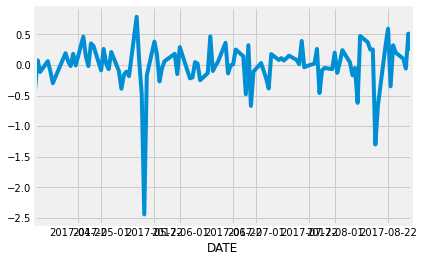

In [108]:
df_CSCO['CSCO seasonal First Difference'].plot()


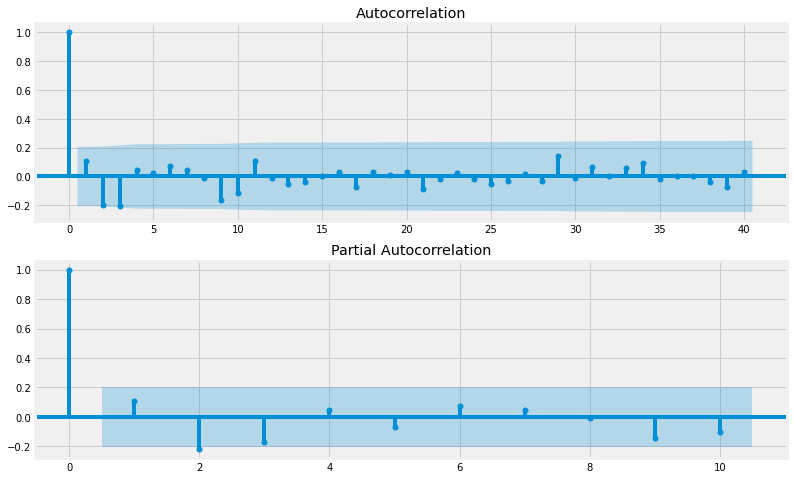

In [109]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_CSCO['CSCO seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_CSCO['CSCO seasonal First Difference'].iloc[13:],lags=10,ax=ax2)


In [110]:
model=ARIMA(df_CSCO['CSCO'],order=(1,1,1))
model_fit=model.fit()


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date ind

In [111]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.CSCO   No. Observations:                  103
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -44.519
Method:                       css-mle   S.D. of innovations              0.373
Date:                Wed, 30 Dec 2020   AIC                             97.038
Time:                        15:00:33   BIC                            107.577
Sample:                             1   HQIC                           101.307
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0073      0.041     -0.177      0.859      -0.088       0.073
ar.L1.D.CSCO    -0.2115      0.314     -0.674      0.500      -0.827       0.404
ma.L1.D.CSCO     0.3610      0.289      1.249      0.212      -0.205       0.927
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -4.7282           +0.0000j            4.7282            0.5000
MA.1           -2.7698           +0.0000j            2.7698            0.5000
-----------------------------------------------------------------------------
"""

In [112]:
#FORECAST EBAY STOCK

In [113]:
df_EBAY = df6['EBAY'].to_frame()


In [114]:
print(df_EBAY.isnull().sum().sum())


0


In [115]:
df_EBAY.dropna(inplace= True)


In [116]:
test_result=adfuller(df_EBAY['EBAY'])


In [117]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


In [118]:
adf_test(df_EBAY['EBAY'])


Results of Dickey-Fuller Test:
Test Statistic                  -1.991801
p-value                          0.290180
#Lags Used                       0.000000
Number of Observations Used    105.000000
Critical Value (1%)             -3.494220
Critical Value (5%)             -2.889485
Critical Value (10%)            -2.581676
dtype: float64


In [119]:
df_EBAY['EBAY First Difference'] = df_EBAY['EBAY'] - df_EBAY['EBAY'].shift(1)


In [120]:
print(df_EBAY.isnull().sum().sum())


1


In [121]:
df_EBAY.dropna(inplace= True)


In [122]:
print(df_EBAY.isnull().sum().sum())


0


In [123]:
df_EBAY['EBAY seasonal First Difference'] = df_EBAY['EBAY'] - df_EBAY['EBAY'].shift(1)


In [124]:
df_EBAY.head(14)


,EBAY,EBAY First Difference,EBAY seasonal First Difference
DATE,,,
2017-04-04,34.140,0.380,NaN
2017-04-05,33.810,-0.330,-0.330
2017-04-06,34.160,0.350,0.350
2017-04-07,33.910,-0.250,-0.250
2017-04-10,34.060,0.150,0.150
2017-04-11,33.990,-0.070,-0.070
2017-04-12,34.250,0.260,0.260
2017-04-13,34.330,0.080,0.080
2017-04-17,34.440,0.110,0.110


In [125]:
df_EBAY.dropna(inplace=True)


In [126]:
print(df_EBAY.isnull().sum().sum())


0


In [127]:
adf_test(df_EBAY['EBAY seasonal First Difference'])


Results of Dickey-Fuller Test:
Test Statistic                 -4.070376
p-value                         0.001084
#Lags Used                      6.000000
Number of Observations Used    97.000000
Critical Value (1%)            -3.499637
Critical Value (5%)            -2.891831
Critical Value (10%)           -2.582928
dtype: float64


<AxesSubplot:xlabel='DATE'>

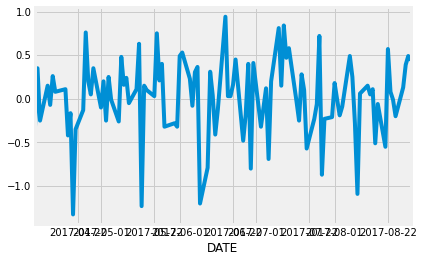

In [128]:
df_EBAY['EBAY seasonal First Difference'].plot()


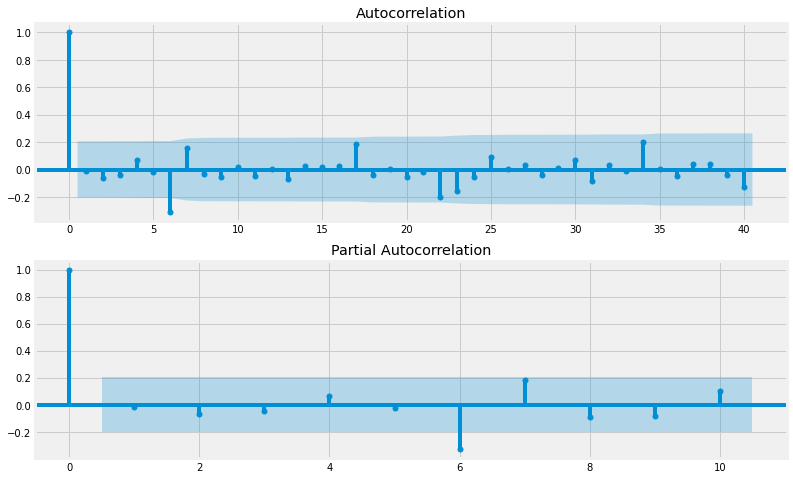

In [129]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_EBAY['EBAY seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_EBAY['EBAY seasonal First Difference'].iloc[13:],lags=10,ax=ax2)


In [131]:
model=ARIMA(df_EBAY['EBAY'],order=(1,1,1))
model_fit=model.fit()


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date ind

In [132]:
model_fit.summary()


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.EBAY   No. Observations:                  103
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -61.042
Method:                       css-mle   S.D. of innovations              0.435
Date:                Wed, 30 Dec 2020   AIC                            130.084
Time:                        15:02:05   BIC                            140.623
Sample:                             1   HQIC                           134.352
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0232      0.044      0.530      0.596      -0.063       0.109
ar.L1.D.EBAY    -0.9592      0.044    -21.583      0.000      -1.046      -0.872
ma.L1.D.EBAY     1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0425           +0.0000j            1.0425            0.5000
MA.1           -1.0000           +0.0000j            1.0000            0.5000
-----------------------------------------------------------------------------
"""